# Neural Network for Handwritten Digit Recognition in Tensorflow

This is a basic neural network that was trained to recognize handwritten digits. The MNIST dataset was used, and the model was written in TensorFlow. The final accuracy on the test set is typically >97%, which is lower than human level performance but is still very high.

In [85]:
import random
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
%matplotlib inline

## Preparing the Data
In this cell, the data was loaded into the notebook and prepared for the model. 

The preparation for the images involved reshaping the 28 by 28 images into vectors of the dimension 784 by 1, and then normalizing the data by subtracting the mean and dividing by the standard deviation. The value epsilon was added to the standard deviation to ensure that the data would not be thrown off if the standard deviation was very small. 

The preparation for the labels involved passing the single integer label values through the "to_categorical" TensorFlow function to convert them to one hot encoded vectors.

An example image is printed out below, along with the corresponding label.

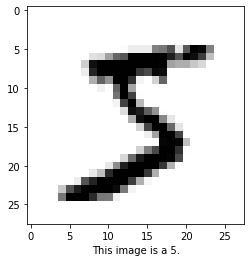

In [86]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train_onedim = np.reshape(x_train, (x_train.shape[0], -1))
x_test_onedim = np.reshape(x_test, (x_test.shape[0], -1))

x_mean = np.mean(x_train_onedim)
x_std = np.std(x_train_onedim)
eps = 1e-10

x_train_norm = (x_train_onedim - x_mean) / (x_std + eps)
x_test_norm = (x_test_onedim - x_mean) / (x_std + eps)

y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

plt.imshow(x_train[0], cmap = 'binary')
plt.xlabel("This image is a {}.".format(y_train[0]))
plt.show()

## Creating the Model
In this cell, the model was created and trained.

The model is a Sequential TensorFlow API. It consists of 4 layers, 2 of which are hidden layers. The first 3 layers are standard Dense layers, with 64 nodes and a ReLu activation function. The output layer (the 4th layer) is a Dense layer with 10 nodes (one node for each number 0 through 9) and a softmax activation function. 

The model is compiled using the Adam optimizer, the categorical crossentropy loss function, and the accuracy metric. 

The model was trained using the training data prepared in the previous cell, with 4 epochs. 

In [87]:
model = Sequential([
    Dense(64, activation = 'relu', input_shape = (784,)),
    Dense(64, activation = 'relu'),
    Dense(64, activation = 'relu'),
    Dense(10, activation = 'softmax')
    ])

model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
    )

model.fit(x_train_norm, y_train_one_hot, epochs = 4)

Epoch 1/4
60000/60000 [==============================] - 2s 31us/sample - loss: 0.2465 - acc: 0.9243
Epoch 2/4
60000/60000 [==============================] - 2s 29us/sample - loss: 0.1248 - acc: 0.9609
Epoch 3/4
60000/60000 [==============================] - 2s 30us/sample - loss: 0.0950 - acc: 0.9701
Epoch 4/4
60000/60000 [==============================] - 2s 31us/sample - loss: 0.0789 - acc: 0.9755


## Testing the Model
In this cell, the model was tested using the testing data prepared previously.

The accuracy on the test set is printed below.

In [88]:
loss, accuracy = model.evaluate(x_test_norm, y_test_one_hot)
print('Accuracy on test set:', accuracy * 100)

10000/10000 [==============================] - 0s 23us/sample - loss: 0.0869 - acc: 0.9725
Accuracy on test set: 97.25000262260437


## Plotting the Predictions
In this cell, 16 of the models predictions are randomly selected and shown with the predicted value, the confidence the model had in the predicted value, and the actual value.

This was done by first defining the function "show_random_test_cases()" and then passing the models predictions through this function.

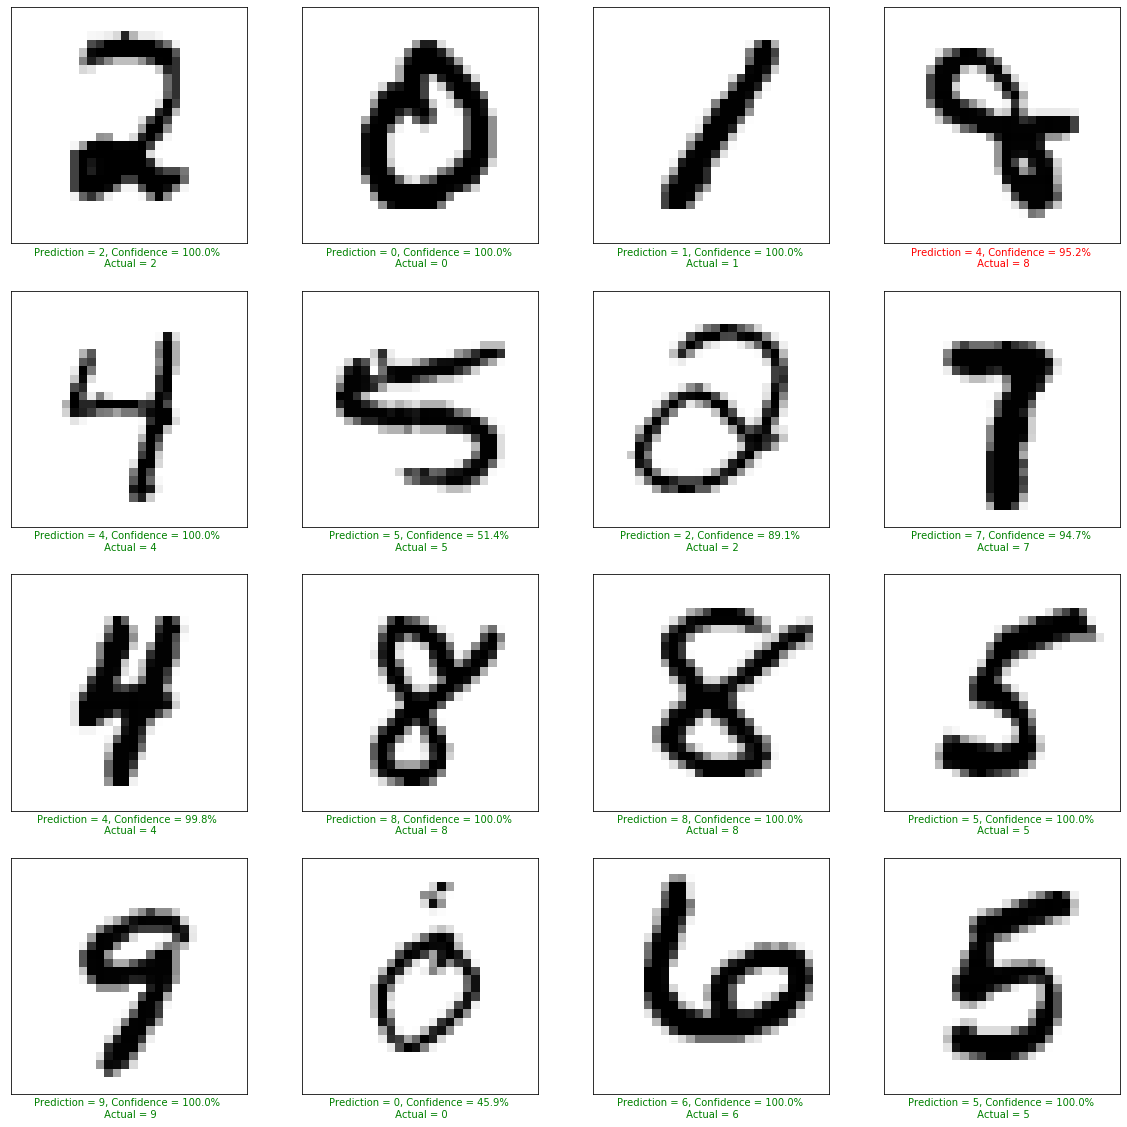

In [98]:
def show_random_test_cases(x, y_pred, y_actual):
    plt.figure(figsize = (20, 20))
    
    for i in range(16):
        plt.subplot(4, 4, i+1)
        plt.grid(False)
        plt.yticks([])
        plt.xticks([])
        
        selection = random.randint(0, x.shape[0]-1)
        prediction = np.argmax(y_pred[selection])
        actual = np.argmax(y_actual[selection])
        confidence = np.round_(np.max(y_pred[selection])*100, decimals = 1)
        
        color = 'g'
        if prediction != actual:
            color = 'r'
        
        plt.xlabel(
            'Prediction = {}, Confidence = {}% \n Actual = {}'.format(prediction, confidence, actual), 
            color = color
            )
        plt.imshow(x[selection], cmap = 'binary')
    
    plt.show()
    
y_pred = model.predict(x_test_norm)
show_random_test_cases(x_test, y_pred, y_test_one_hot)